In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [4]:
# Kernel function
def RBF_kernel(x1, x2, a_1 = 200.0, a_2 = 0.1):
    return a_1 * np.exp(-a_2 * 0.5* np.dot(x1-x2, x1-x2))

# Gaussian process
def pred(x, x_train, y_train, a_1 = 200, a_2 = 1):
    # Calculate the kernel matrix
    K = np.zeros((len(x_train), len(x_train)))
    for i in range(len(x_train)):
        for j in range(len(x_train)):
            K[i,j] = RBF_kernel(x_train[i], x_train[j], a_1, a_2)
    # Calculate the inverse of the kernel matrix
    K_inv = np.linalg.inv(K)
    # Calculate the kernel vector
    k = np.zeros(len(x_train))
    for i in range(len(x_train)):
        k[i] = RBF_kernel(x_train[i], x, a_1, a_2)
    # Calculate the mean and variance
    mu = np.dot(k, np.dot(K_inv, y_train))
    var = RBF_kernel(x, x, a_1, a_2) - np.dot(k, np.dot(K_inv, k))
    return mu, var

In [22]:
# Generate training data
x_train = np.arange(-5, 5, 0.8)
y_train = np.sin(x_train)

In [23]:
# prediction
x_pred = np.arange(-5, 5, 0.01)

y_pred = np.zeros(len(x_pred))
y_std = np.zeros(len(x_pred))
for i in range(len(x_pred)):
    mu, var = pred(x_pred[i], x_train, y_train)
    y_pred[i] = mu
    y_std[i] = np.sqrt(var)

/var/folders/v9/ks1bt2jd7fq14x1k2xx9x7p40000gn/T/ipykernel_19947/4289345633.py:9: RuntimeWarning: invalid value encountered in sqrt
  y_std[i] = np.sqrt(var)


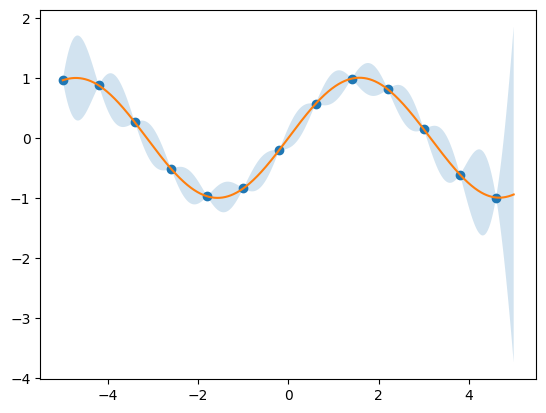

In [24]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_pred, y_pred)
plt.fill_between(x_pred, y_pred - y_std, y_pred + y_std, alpha = 0.2, )


In [2]:
import pandas as pd
import plotly.express as px



df = pd.read_csv('./data/articles.csv')
fig = go.FigureWidget(px.scatter(df, x='page_views_count', y='likes_count'))

n = len(df)
scatter = fig.data[0]
colors = ['blue'] * n
scatter.marker.color = colors
scatter.marker.size = [10] * n

def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = 'red'
        s[i] = 20
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s

scatter.on_click(update_point)
fig

FileNotFoundError: [Errno 2] No such file or directory: './data/articles.csv'